## 特征数据预处理-标准化与归一化

## 标准化
同样我们都需要对原始数据进行处理，少不了的就**standardization**（或者叫做**Z-score normalization）**


要求均值**μ=0**和标准差**σ=1**

转换公式如下：（形成均值为0，标准差为1的分布，使得所有特征占比权重相等）

$$
z=\frac{x-\mu}{\sigma}
$$


这个意义是十分重大的，想想一下，我们经常通过梯度下降来进行优化求解，公式一般如下，如果特征之间数值差异太大，那么更新的结果肯定会产生较大的差异，这是我们不希望的。在最开始的时候，我们认为特征之间的重要程度是一样的，并不想偏袒哪个特征，所以这步预处理工作必须要做！

$$
\varDelta w_j=-\eta \frac{\partial J}{\partial w_j}=\eta \sum_i{\left( t^{\left( i \right)}-o^{\left( i \right)} \right)}x_{j}^{\left( i \right)}
$$


## 归一化

另一种方法叫做**Min-Max scaling**(或者叫做“**normalization**”也就是我们常说的0-1归一化)
处理后的所有特征值会被压缩到0-1区间上，这样做可以抑制离群值对结果的影响，归一化公式如下：

$$
X_{norm}=\frac{X-X_{\min}}{X_{\max}-X_{\min}}
$$


In [21]:
import pandas as pd
import numpy as np
house = pd.read_csv('listings.csv')
cols = ['bedrooms', 'bathrooms','maximum_nights']
selected_house = house[cols]
selected_house.head()

,bedrooms,bathrooms,maximum_nights
0,1.0,1.0,1125
1,3.0,3.0,30
2,1.0,2.0,1125
3,1.0,1.0,1125
4,1.0,1.0,1125


在数据中，房间个数和最多住几晚衡量标准应该统一，特征之间数值差异较大。

In [30]:
print(selected_house.info())
selected_house = selected_house.dropna()
selected_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 3 columns):
bedrooms          3702 non-null float64
bathrooms         3696 non-null float64
maximum_nights    3723 non-null int64
dtypes: float64(2), int64(1)
memory usage: 87.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3722
Data columns (total 3 columns):
bedrooms          3675 non-null float64
bathrooms         3675 non-null float64
maximum_nights    3675 non-null int64
dtypes: float64(2), int64(1)
memory usage: 114.8 KB


#### Standardization and Min-Max Scaling

In [65]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(selected_house)
selected_house_std = std_scale.transform(selected_house)

minmax_scale = preprocessing.MinMaxScaler().fit(selected_house)
selected_house_minmax = minmax_scale.transform(selected_house)

#### Plotting

In [66]:
%matplotlib inline

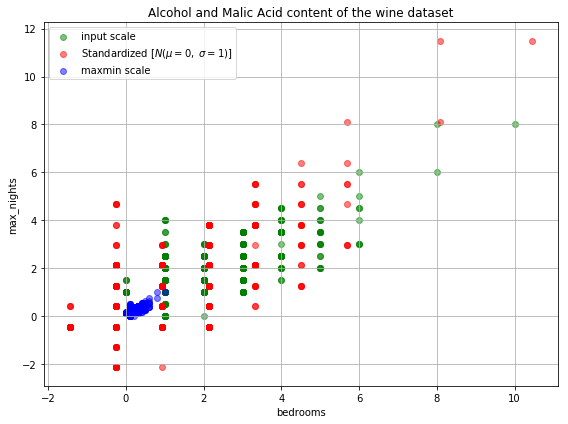

In [72]:
import matplotlib.pyplot as plt

def plot():
    plt.figure(figsize = (8,6))
    plt.scatter(selected_house['bedrooms'], selected_house['bathrooms'],
              c = 'green', label = 'input scale', alpha = 0.5)
    
    plt.scatter(selected_house_std[:,0], selected_house_std[:,1],
               c = 'red', label = 'Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha = 0.5)
    
    plt.scatter(selected_house_minmax[:,0], selected_house_minmax[:,1],
               c = 'blue', label = 'maxmin scale', alpha = 0.5)
    
    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('bedrooms')
    plt.ylabel('max_nights')
    plt.legend(loc = 'upper left')
    plt.grid()  #添加网格
    
    plt.tight_layout()
plot()
plt.show()

In [63]:
selected_house_minmax

array([[ -2.49955793e-01,  -4.39365440e-01,  -1.65657204e-02],
       [  2.12672607e+00,   2.96890472e+00,  -1.65966353e-02],
       [ -2.49955793e-01,   1.26476964e+00,  -1.65657204e-02],
       ..., 
       [  9.38385138e-01,  -4.39365440e-01,   6.06128727e+01],
       [ -2.49955793e-01,  -4.39365440e-01,  -1.65968894e-02],
       [ -1.43829672e+00,  -4.39365440e-01,  -1.65657204e-02]])

In [64]:
selected_house_std

array([[ -2.49955793e-01,  -4.39365440e-01,  -1.65657204e-02],
       [  2.12672607e+00,   2.96890472e+00,  -1.65966353e-02],
       [ -2.49955793e-01,   1.26476964e+00,  -1.65657204e-02],
       ..., 
       [  9.38385138e-01,  -4.39365440e-01,   6.06128727e+01],
       [ -2.49955793e-01,  -4.39365440e-01,  -1.65968894e-02],
       [ -1.43829672e+00,  -4.39365440e-01,  -1.65657204e-02]])

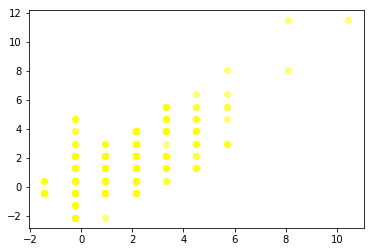

In [61]:
    plt.scatter(selected_house_std[:,0], selected_house_std[:,1],
               c = 'yellow', label = 'std scale', alpha = 0.5)

0    1125
1      30
2    1125
3    1125
4    1125
Name: maximum_nights, dtype: int64

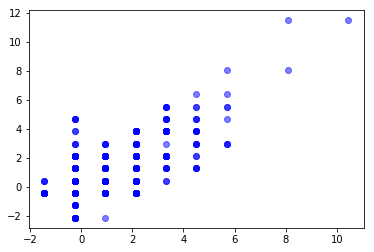